# KNN Traning

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris



import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor


In [2]:
models = [
    {
        "name": "KNN",
        "model": KNeighborsRegressor(n_neighbors=10)
    },
    {
        "name": "Linear Regression",
        "model": LinearRegression()
    },
    # {
    #     "name": "Random Forest",
    #     "model": RandomForestRegressor(n_estimators=100)
    # },
    # {
    #     "name": "Decision Tree",
    #     "model": DecisionTreeRegressor()
    # },
   {     "name": "XGBoost",
        "model": XGBRegressor(
        n_estimators=300,       # number of trees
        learning_rate=0.05,     # smaller = slower but more accurate
        max_depth=6,            # tree depth
        subsample=0.8,          # use 80% of data per tree
        colsample_bytree=0.8,   # use 80% of features per tree
        random_state=42
        )
    },
    { 'name': 'LightGBM', 'model': LGBMRegressor(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42
    ) },
]

results = []





In [3]:
# Load datasets from pickle file
from pickle import load
datasets = load(open('datasets.pkl', 'rb'))

In [4]:
# Evaluate each model on the dataset
for dataset in datasets:
    X_train = dataset["X_train"]
    X_test = dataset["X_test"]
    y_train = dataset["y_train"]
    y_test = dataset["y_test"]

    for model in models:
        model_name = model["name"]
        # answer = input(f"Do you want to run {model_name} on {dataset['name']} dataset? (y/n): ")
        # if answer.lower() != 'y':
        #     continue
        model_instance = model["model"]
        model_instance.fit(X_train, y_train)
        y_pred = model_instance.predict(X_test)
        r2_score_value = r2_score(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        results.append({
            "model": model_name,
            "dataset": dataset["name"],
            "R2 score": r2_score_value,
            "MAE": mae,
            "MSE": mse,
            "RMSE": rmse
        })

# Convert results to DataFrame
results_df = pd.DataFrame(results)
results_df

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002768 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2633
[LightGBM] [Info] Number of data points in the train set: 186180, number of used features: 52
[LightGBM] [Info] Start training from score 41.128429
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003303 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2632
[LightGBM] [Info] Number of data points in the train set: 186180, number of used features: 52
[LightGBM] [Info] Start training from score 41.128429
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002518 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not e

,model,dataset,R2 score,MAE,MSE,RMSE
0,KNN,with robust,0.678407,7.846452,107.078005,10.347850
1,Linear Regression,with robust,0.723390,7.262221,92.100419,9.596896
2,XGBoost,with robust,0.737158,7.097007,87.516214,9.355010
3,LightGBM,with robust,0.735873,7.114766,87.944301,9.377862
4,KNN,with minmax,0.707818,7.512495,97.285239,9.863328
5,Linear Regression,with minmax,0.723390,7.262221,92.100419,9.596896
6,XGBoost,with minmax,0.737158,7.097007,87.516214,9.355010
7,LightGBM,with minmax,0.736259,7.110344,87.815738,9.371005
8,KNN,with standart,0.689338,7.698881,103.438622,10.170478
9,Linear Regression,with standart,0.723390,7.262221,92.100419,9.596896


Result: XGBoost has the best results with standart scaler. Now it's hyperparameter tuning time.

## Hyperparamater Tuning

In [ ]:
#    {     "name": "XGBoost",
#         "model": XGBRegressor(
#         n_estimators=300,       # number of trees
#         learning_rate=0.05,     # smaller = slower but more accurate
#         max_depth=6,            # tree depth
#         subsample=0.8,          # use 80% of data per tree
#         colsample_bytree=0.8,   # use 80% of features per tree
#         random_state=42
#         )
#     },

In [5]:
# Random search for hyperparameter tuning of XGBoost
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
# Define the parameter grid
param_dist = {
    'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)],
    'learning_rate': [float(x) for x in np.linspace(start = 0.01, stop = 1, num = 10)], 
    'max_depth': [int(x) for x in np.linspace(start = 1, stop = 15, num = 10)],
    'subsample': [float(x) for x in np.linspace(start = 0.1, stop = 1, num = 10)],
    'colsample_bytree': [float(x) for x in np.linspace(start = 0.1, stop = 1, num = 10)],
    'random_state' : [42]
    
}

param_dist

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
 'learning_rate': [0.01, 0.12, 0.23, 0.34, 0.45, 0.56, 0.67, 0.78, 0.89, 1.0],
 'max_depth': [1, 2, 4, 5, 7, 8, 10, 11, 13, 15],
 'subsample': [0.1,
  0.2,
  0.30000000000000004,
  0.4,
  0.5,
  0.6,
  0.7000000000000001,
  0.8,
  0.9,
  1.0],
 'colsample_bytree': [0.1,
  0.2,
  0.30000000000000004,
  0.4,
  0.5,
  0.6,
  0.7000000000000001,
  0.8,
  0.9,
  1.0],
 'random_state': [42]}

In [6]:
XG_reg = XGBRegressor()
XG_random = RandomizedSearchCV(estimator = XG_reg, param_distributions = param_dist, n_iter = 50, cv = 3, verbose=2, random_state=42, n_jobs = -1)
for dataset in datasets:
    if dataset["name"] == "with standart":
        X_train = dataset["X_train"]
        X_test = dataset["X_test"]
        y_train = dataset["y_train"]
        y_test = dataset["y_test"]
XG_random.fit(X_train, y_train)
XG_random.best_params_


Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] END colsample_bytree=0.8, learning_rate=0.67, max_depth=13, n_estimators=600, random_state=42, subsample=0.1; total time=  21.7s
[CV] END colsample_bytree=0.8, learning_rate=0.67, max_depth=13, n_estimators=600, random_state=42, subsample=0.1; total time=  21.9s
[CV] END colsample_bytree=0.8, learning_rate=0.67, max_depth=13, n_estimators=600, random_state=42, subsample=0.1; total time=  21.3s
[CV] END colsample_bytree=0.1, learning_rate=0.01, max_depth=13, n_estimators=1400, random_state=42, subsample=0.1; total time=  48.6s
[CV] END colsample_bytree=0.1, learning_rate=0.01, max_depth=13, n_estimators=1400, random_state=42, subsample=0.1; total time=  48.6s
[CV] END colsample_bytree=0.1, learning_rate=0.01, max_depth=13, n_estimators=1400, random_state=42, subsample=0.1; total time=  49.0s
[CV] END colsample_bytree=0.1, learning_rate=0.67, max_depth=4, n_estimators=1400, random_state=42, subsample=0.6; total time=  16.

{'subsample': 0.7000000000000001,
 'random_state': 42,
 'n_estimators': 200,
 'max_depth': 10,
 'learning_rate': 0.12,
 'colsample_bytree': 0.5}

## Best hyperparameters:

 - 'subsample': 0.7,
 - 'random_state': 42,
 - 'n_estimators': 200,
 - 'max_depth': 10,
 - 'learning_rate': 0.12,
 - 'colsample_bytree': 0.5

In [9]:
# apply best hyperparameters and evaluate XGBoost with std scaler
best_XG = XGBRegressor(
    n_estimators=200,
    learning_rate=0.12,
    max_depth=10,
    subsample=0.7,
    colsample_bytree=0.5,
    random_state=42
)
best_XG.fit(X_train, y_train)
y_pred = best_XG.predict(X_test)
r2_score_value = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
results.append({
    "model": "XGBoost with best hyperparameters",
    "dataset": "with standart",
    "R2 score": r2_score_value,
    "MAE": mae,
    "MSE": mse,
    "RMSE": rmse
})
# Convert results to DataFrame
results_df = pd.DataFrame(results)
results_df



,model,dataset,R2 score,MAE,MSE,RMSE
0,KNN,with robust,0.678407,7.846452,107.078005,10.347850
1,Linear Regression,with robust,0.723390,7.262221,92.100419,9.596896
2,XGBoost,with robust,0.737158,7.097007,87.516214,9.355010
3,LightGBM,with robust,0.735873,7.114766,87.944301,9.377862
4,KNN,with minmax,0.707818,7.512495,97.285239,9.863328
5,Linear Regression,with minmax,0.723390,7.262221,92.100419,9.596896
6,XGBoost,with minmax,0.737158,7.097007,87.516214,9.355010
7,LightGBM,with minmax,0.736259,7.110344,87.815738,9.371005
8,KNN,with standart,0.689338,7.698881,103.438622,10.170478
9,Linear Regression,with standart,0.723390,7.262221,92.100419,9.596896


# Optimization of Modelling in different ways

### 1. Residual Analysis

Text(0.5, 1.0, 'Residual Plot')

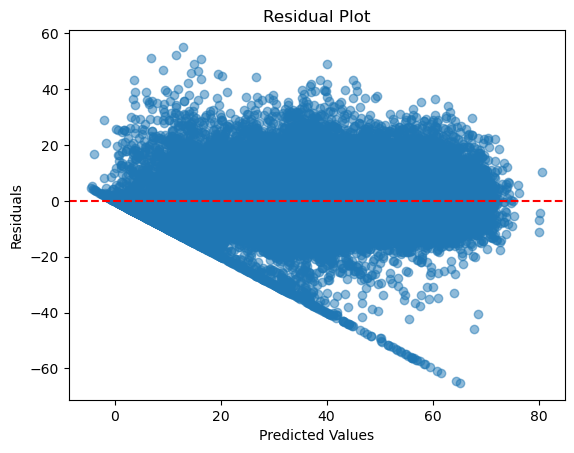

In [15]:
#calculate residuals
residuals = y_test - y_pred
# Plot residuals
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')